In [1]:
#data loading
import pandas as pd
filename="/content/azprocedure.csv"
a=pd.read_csv(str(filename))

print(a)

      rownames  los  procedure  sex  admit  age75  hospital
0            1   67          1    0      1      0       3.6
1            2   53          0    0      1      0       6.7
2            3   51          1    0      0      0       2.5
3            4   30          0    0      1      0       6.5
4            5   43          1    0      0      0       3.7
...        ...  ...        ...  ...    ...    ...       ...
3584      3585   13          1    1      1      1       4.3
3585      3586   13          1    0      1      1       2.7
3586      3587   13          1    0      1      1       5.2
3587      3588   14          1    1      1      1       6.5
3588      3589   19          1    1      1      1       5.2

[3589 rows x 7 columns]


In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
los,0
procedure,0
sex,0
admit,0
age75,0
hospital,0


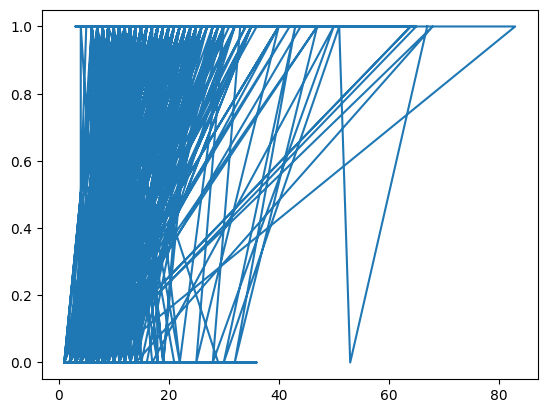

In [4]:
from matplotlib import pyplot as plt
target="procedure"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 3589 artists>

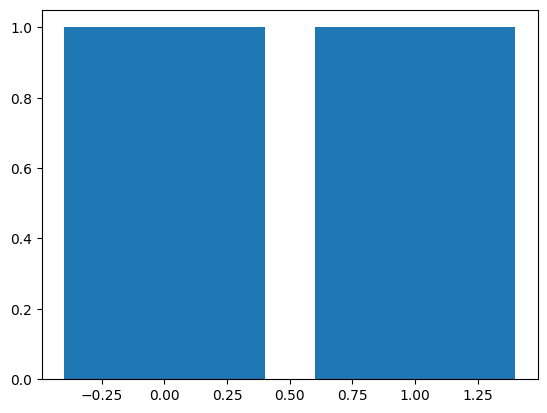

In [6]:
#Bar plot of sex versus procedure
plt.bar(a[a.columns[3]],a[str(target)])

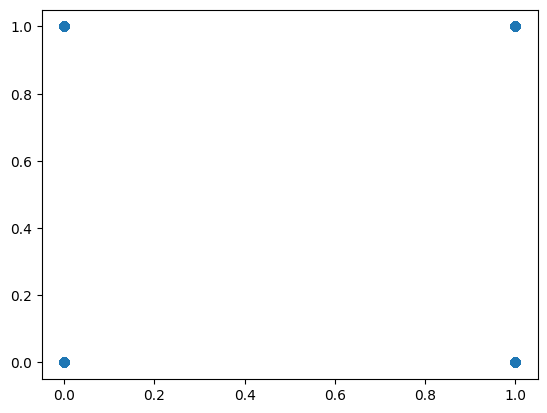

In [7]:
#Scatter plot of sex versus procedure
plt.scatter(a[a.columns[3]], a[str(target)])

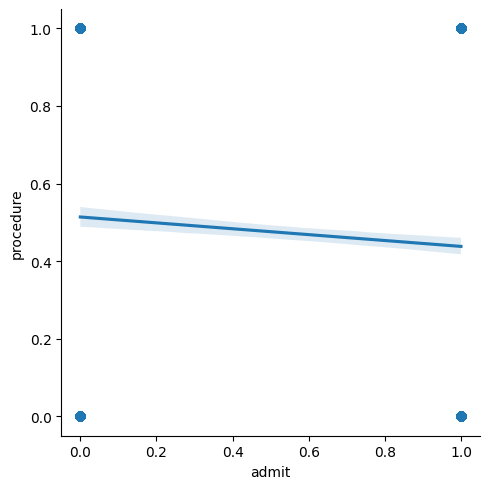

In [9]:
#lmplot of admit versus procedure
import seaborn as sns
#a["family"] = pd.to_numeric(a["family"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="admit",y=str(target),data=a)

<Axes: xlabel='age75', ylabel='procedure'>

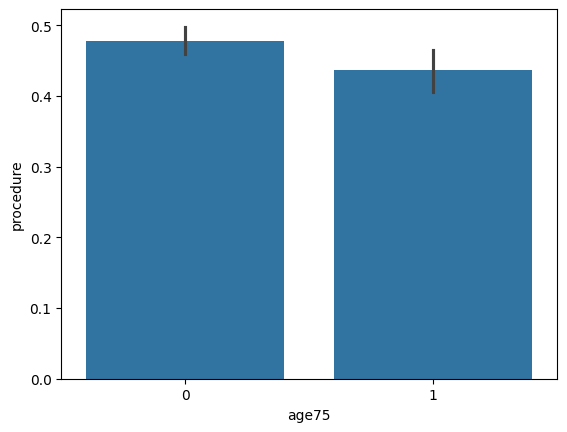

In [10]:
#SNS bar plot of age 75 versus procedure
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='hospital', ylabel='procedure'>

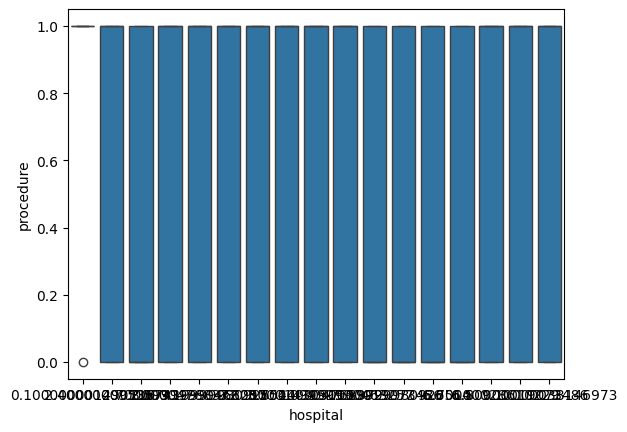

In [11]:
#Box plot of hospital Vs procedure
sns.boxplot(x=a.columns[6],y=str(target),data=a)

<ipython-input-13-8751a65dfa64>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='procedure', ylabel='Density'>

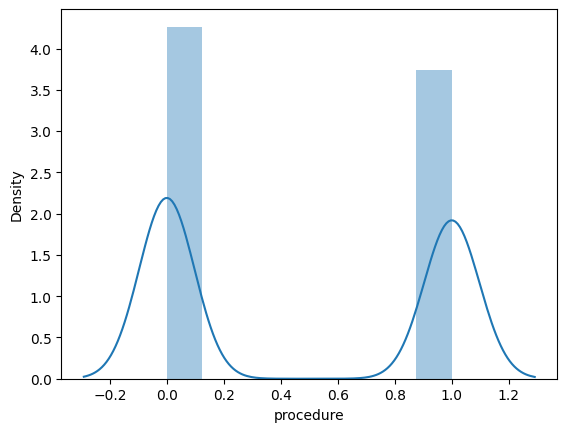

In [13]:
#distplot of procedure
sns.distplot(a[str(target)])

<Axes: xlabel='villnum', ylabel='Density'>

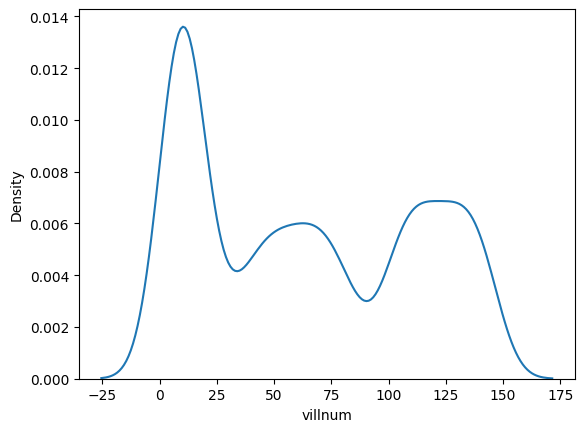

In [ ]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='admit', ylabel='count'>

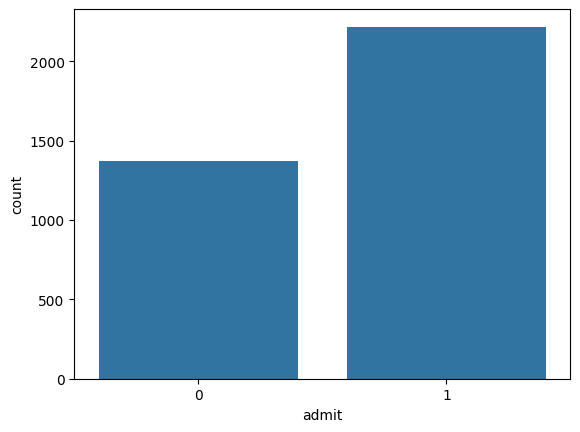

In [14]:
#Count plot for admit
sns.countplot(x=a.columns[4],data=a)

<Axes: >

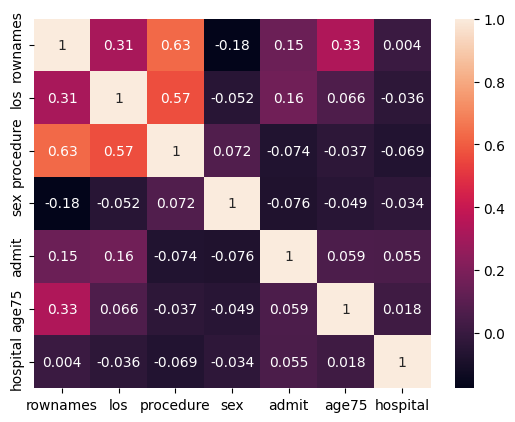

In [15]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()

sns.heatmap(data, annot=True)

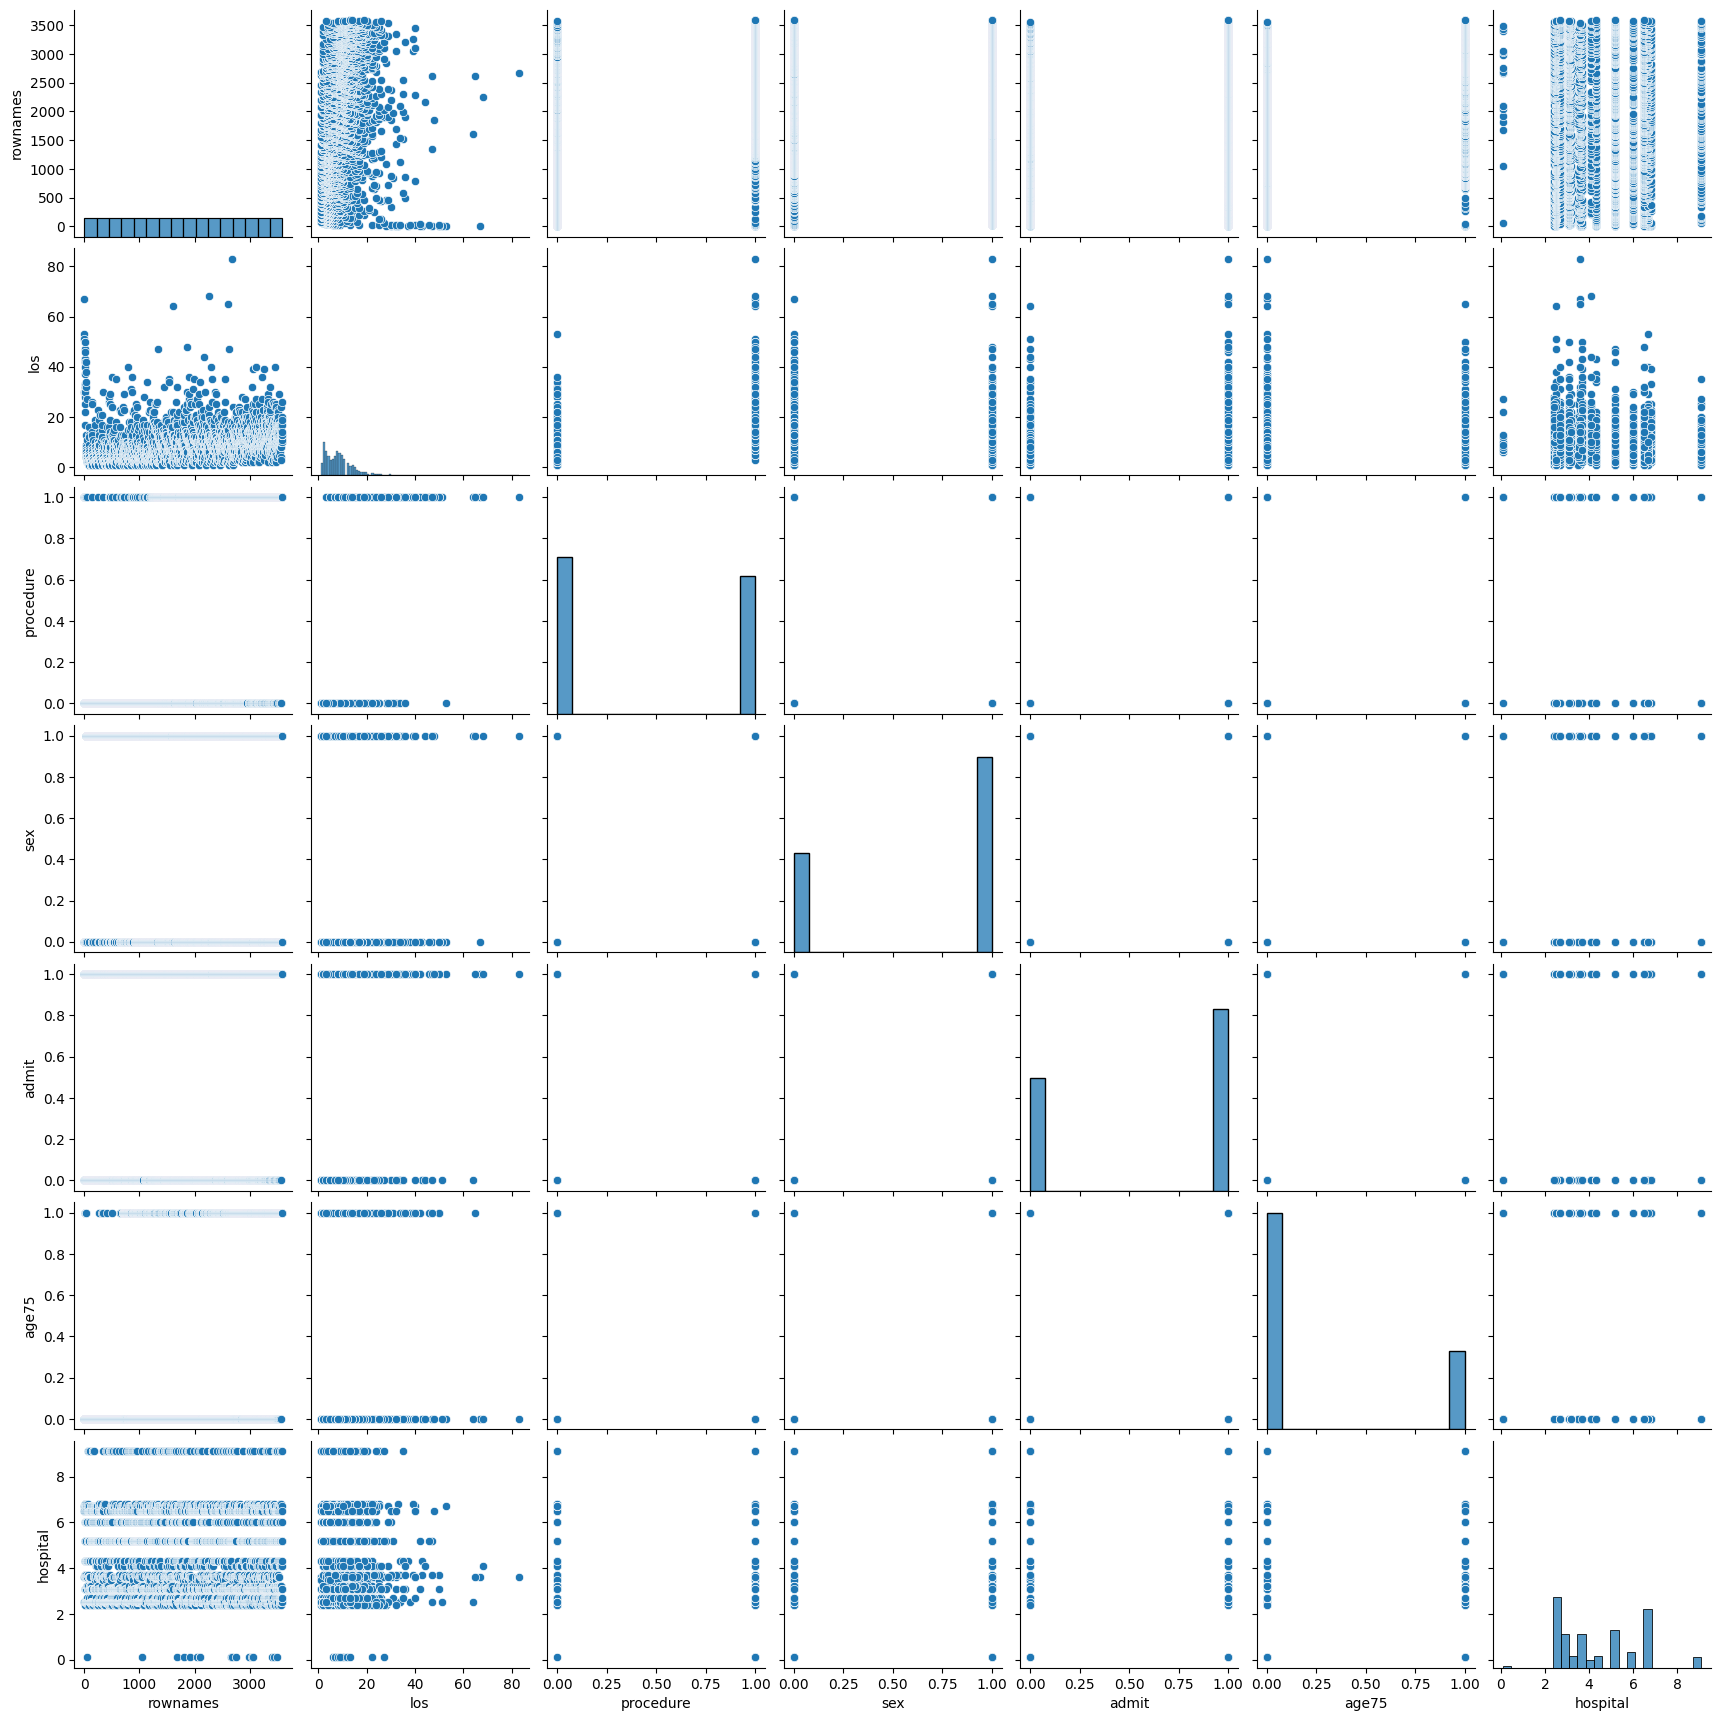

In [17]:
#Pairplot
sns.pairplot(data=a)

In [18]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames  los  sex  admit  age75  hospital
0            1   67    0      1      0       3.6
1            2   53    0      1      0       6.7
2            3   51    0      0      0       2.5
3            4   30    0      1      0       6.5
4            5   43    0      0      0       3.7
...        ...  ...  ...    ...    ...       ...
3584      3585   13    1      1      1       4.3
3585      3586   13    0      1      1       2.7
3586      3587   13    0      1      1       5.2
3587      3588   14    1      1      1       6.5
3588      3589   19    1      1      1       5.2

[3589 rows x 6 columns]


In [19]:
print(y)

0       1
1       0
2       1
3       0
4       1
       ..
3584    1
3585    1
3586    1
3587    1
3588    1
Name: procedure, Length: 3589, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
print(x_train)

      rownames  los  sex  admit  age75  hospital
231        232    2    1      0      0       6.7
1443      1444    3    0      0      0       6.0
2378      2379   20    0      1      0       2.4
792        793   15    1      0      1       9.1
3145      3146    9    0      0      1       3.1
...        ...  ...  ...    ...    ...       ...
2542      2543   35    1      1      1       2.7
3450      3451   14    1      1      0       2.4
445        446    1    1      0      0       6.0
1939      1940   16    1      0      0       4.1
1084      1085    5    0      1      0       6.8

[2871 rows x 6 columns]


In [22]:
print(y_train)

231     0
1443    0
2378    1
792     0
3145    1
       ..
2542    1
3450    1
445     0
1939    1
1084    0
Name: procedure, Length: 2871, dtype: int64


In [23]:
print(x_test)

      rownames  los  sex  admit  age75  hospital
1721      1722    6    1      1      0       6.0
2367      2368    3    0      0      1       6.0
1367      1368    2    0      0      0       3.1
816        817    3    0      0      0       6.0
1906      1907    9    1      0      0       2.7
...        ...  ...  ...    ...    ...       ...
1778      1779    8    0      1      0       5.2
166        167    3    1      0      0       6.5
694        695    2    1      1      0       3.1
2160      2161    3    0      1      0       6.0
2268      2269   13    0      1      0       6.5

[718 rows x 6 columns]


In [24]:
print(y_test)

1721    0
2367    0
1367    0
816     0
1906    1
       ..
1778    0
166     0
694     0
2160    0
2268    1
Name: procedure, Length: 718, dtype: int64


In [25]:
from sklearn.linear_model import LogisticRegression
y_train=y_train.astype('int')

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print(ypred)

[0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0
 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0
 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1
 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1
 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1
 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1
 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0
 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1
 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 1 1 1 1 0 1 0 1 0 1 1 1 

In [27]:
#Print accuracy score
from sklearn.metrics import accuracy_score
y_test=y_test.astype('int')
print(accuracy_score(y_test,ypred))

0.9498607242339833


In [28]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[343  22]
 [ 14 339]]


In [30]:
print(model.predict([[1722,6,1,1,0,6.0]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [32]:
print(ypred)

[0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0
 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1
 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1
 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1
 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1
 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1
 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1
 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 1 1 1 1 0 1 1 0 0 1 1 1 

In [33]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.9401114206128134


In [34]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[343  22]
 [ 21 332]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       365
           1       0.94      0.94      0.94       353

    accuracy                           0.94       718
   macro avg       0.94      0.94      0.94       718
weighted avg       0.94      0.94      0.94       718



In [37]:
print(model.predict([[1722,6,1,1,0,6.0]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [39]:
print(ypred)

[0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0
 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1
 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1
 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1
 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0
 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1
 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 1 1 1 1 0 1 0 1 0 1 1 1 

In [40]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.9554317548746518


In [41]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[344  21]
 [ 11 342]]


In [42]:
print(model.predict([[1722,6,1,1,0,6.0]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       365
           1       0.94      0.97      0.96       353

    accuracy                           0.96       718
   macro avg       0.96      0.96      0.96       718
weighted avg       0.96      0.96      0.96       718

